In [51]:
import pandas as pd
import numpy as np
base = pd.read_csv('out.txt',sep=',')
#base = pd.read_csv('out_method4_NUM_THREADS_1.txt',sep=',')
data1 = pd.read_csv('out_method3_NUM_THREADS_2.txt',sep=',')
data2 = pd.read_csv('out_method3_NUM_THREADS_3.txt',sep=',')
data3 = pd.read_csv('out_method3_NUM_THREADS_4.txt',sep=',')
data4 = pd.read_csv('out_method3_NUM_THREADS_5.txt',sep=',')
base = pd.DataFrame(base)
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)
data3 = pd.DataFrame(data3)
data4 = pd.DataFrame(data4)
base.index+=1
data1.index+=1
data2.index+=1
data3.index+=1
data4.index+=1
df0=base[:-1]
df1=data1[:-1]
df2=data2[:-1]
df3=data3[:-1]
df4=data4[:-1]
tf0=base[len(base)-1:]
tf1=data1[len(data1)-1:]
tf2=data2[len(data2)-1:]
tf3=data3[len(data3)-1:]
tf4=data4[len(data4)-1:]
df0

,framenum,queue density,dynamic density
1,3,0.064431,0.026519
2,6,0.074689,0.078773
3,9,0.087517,0.043476
4,12,0.091987,0.050687
5,15,0.095882,0.057198
...,...,...,...
1908,5724,0.555744,0.000000
1909,5727,0.555403,0.000000
1910,5730,0.555119,0.000000
1911,5733,0.554877,0.000061


<IPython.core.display.Javascript object>


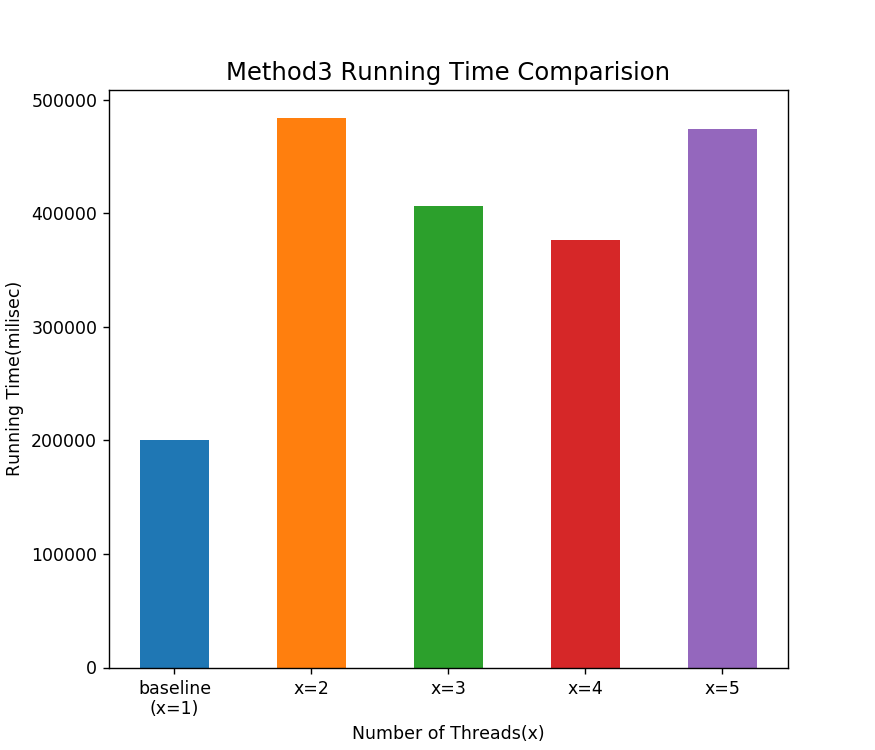

In [52]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,6))
width = 0.5
plt.bar("baseline\n(x=1)",tf0["queue density"],width)
plt.bar("x=2",tf1["queue density"],width)
plt.bar("x=3",tf2["queue density"],width)
plt.bar("x=4",tf3["queue density"],width)
plt.bar("x=5",tf4["queue density"],width)
plt.ylabel('Running Time(milisec)')
plt.xlabel('Number of Threads(x)')
plt.title('Method3 Running Time Comparision',fontsize=14)
plt.savefig('method3_1.png')

<IPython.core.display.Javascript object>


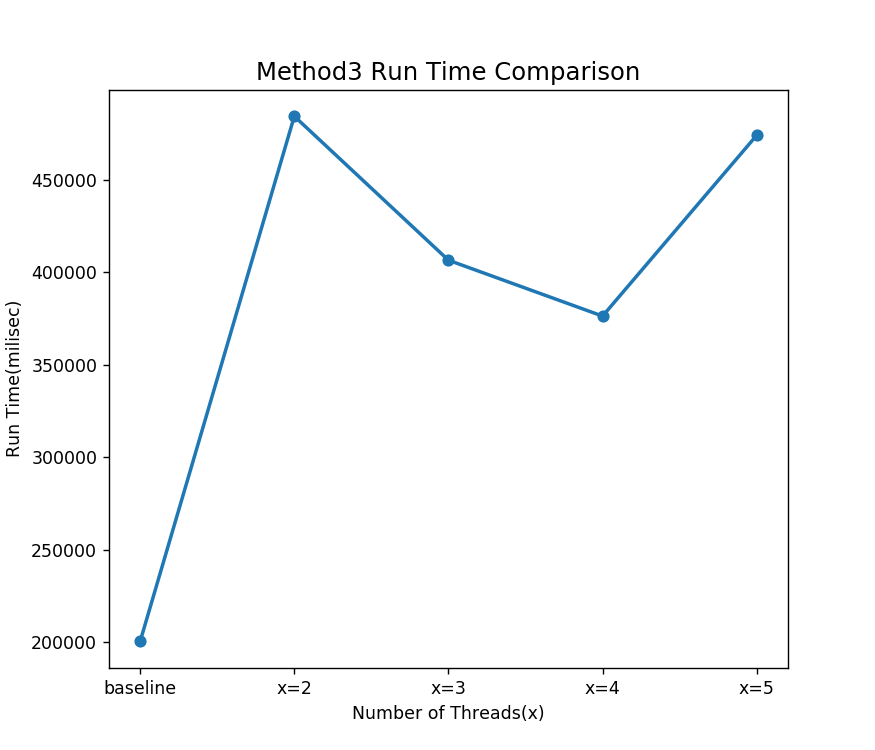

In [54]:
fig = plt.figure(figsize=(7,6))
width = 0.5
plt.plot(["baseline","x=2","x=3","x=4","x=5"],[tf0.loc[1913,"queue density"],tf1.loc[1913,"queue density"],tf2.loc[1913,"queue density"],tf3.loc[1913,"queue density"],tf4.loc[1913,"queue density"]],linewidth=2,marker='o')
plt.ylabel('Run Time(milisec)')
plt.xlabel('Number of Threads(x)')
plt.title('Method3 Run Time Comparison',fontsize=14)
plt.savefig('method3_2.png')

In [55]:
for i in df0.index:
    df1.loc[i,"error_queue"]=(df0.loc[i,"queue density"]-df1.loc[i,"queue density"])**2
    df1.loc[i,"error_dynamic"]=(df0.loc[i,"dynamic density"]-df1.loc[i,"dynamic density"])**2
for i in df0.index:
    df2.loc[i,"error_queue"]=(df0.loc[i,"queue density"]-df2.loc[i,"queue density"])**2
    df2.loc[i,"error_dynamic"]=(df0.loc[i,"dynamic density"]-df2.loc[i,"dynamic density"])**2
for i in df0.index:
    df3.loc[i,"error_queue"]=(df0.loc[i,"queue density"]-df3.loc[i,"queue density"])**2
    df3.loc[i,"error_dynamic"]=(df0.loc[i,"dynamic density"]-df3.loc[i,"dynamic density"])**2
for i in df0.index:
    df4.loc[i,"error_queue"]=(df0.loc[i,"queue density"]-df4.loc[i,"queue density"])**2
    df4.loc[i,"error_dynamic"]=(df0.loc[i,"dynamic density"]-df4.loc[i,"dynamic density"])**2
l_q=[]
l_d=[]
l_q+=[(sum(df1["error_queue"])/len(df0))**0.5,(sum(df2["error_queue"])/len(df0))**0.5,(sum(df3["error_queue"])/len(df0))**0.5,(sum(df4["error_queue"])/len(df0))**0.5]
l_d+=[(sum(df1["error_dynamic"])/len(df0))**0.5,(sum(df2["error_dynamic"])/len(df0))**0.5,(sum(df3["error_dynamic"])/len(df0))**0.5,(sum(df4["error_dynamic"])/len(df0))**0.5]

C:\Users\abhin\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\abhin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<IPython.core.display.Javascript object>


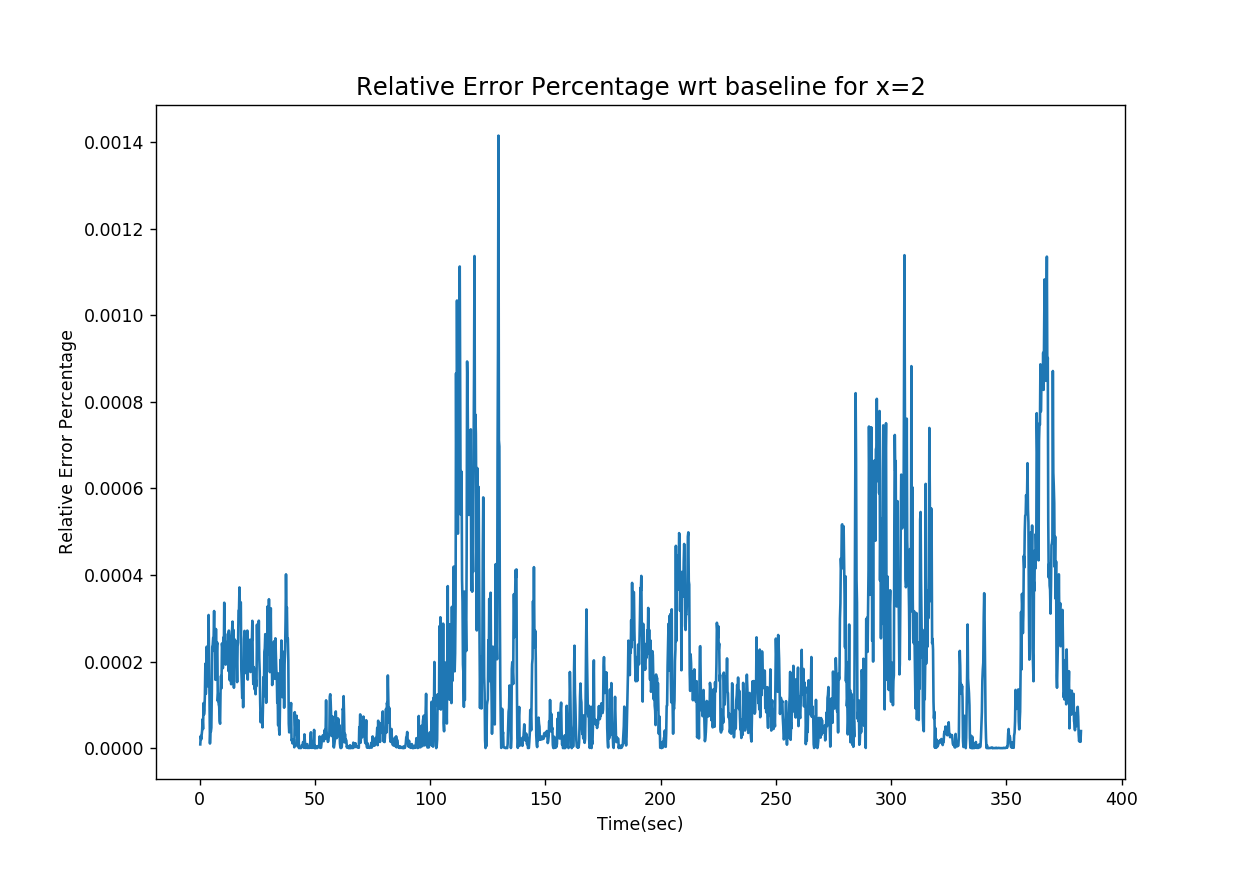

Text(0.5, 1.0, 'Relative Error Percentage wrt baseline for x=2')

In [56]:
fig = plt.figure(figsize=(10,7))
plt.plot(df1["error_queue"]*100)
plt.ylabel('Relative Error Percentage')
plt.xlabel('Time(sec)')
ax=plt.gca()
ax.set_xticklabels([0,0,50,100,150,200,250,300,350,400])
plt.title('Relative Error Percentage wrt baseline for x=2',fontsize=14)
#plt.legend(labels=["dense dynamic density","sparse dynamic density"])
#plt.savefig('method_extra_1.png')

<IPython.core.display.Javascript object>


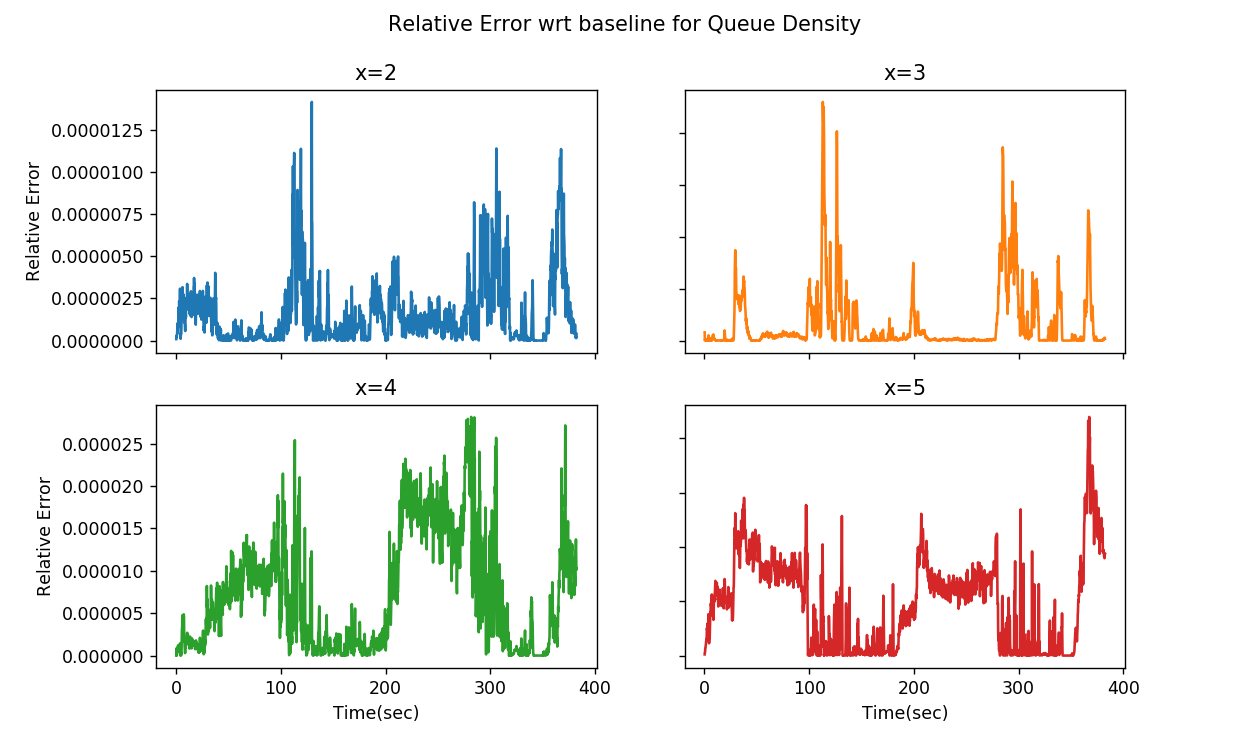

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,6))
ax1.set_xticklabels([0,0,100,200,300,400])
ax2.set_xticklabels([0,0,100,200,300,400])
ax3.set_xticklabels([0,0,100,200,300,400])
ax4.set_xticklabels([0,0,100,200,300,400])
fig.suptitle('Relative Error wrt baseline for Queue Density')
ax1.plot(df1["error_queue"])
ax1.set_title('x=2')
ax2.plot(df2["error_queue"], 'tab:orange')
ax2.set_title('x=3')
ax3.plot(df3["error_queue"], 'tab:green')
ax3.set_title('x=4')
ax4.plot(df4["error_queue"], 'tab:red')
ax4.set_title('x=5')
for ax in fig.get_axes():
    ax.set(xlabel='Time(sec)', ylabel='Relative Error')
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('method3_3.png')

<IPython.core.display.Javascript object>


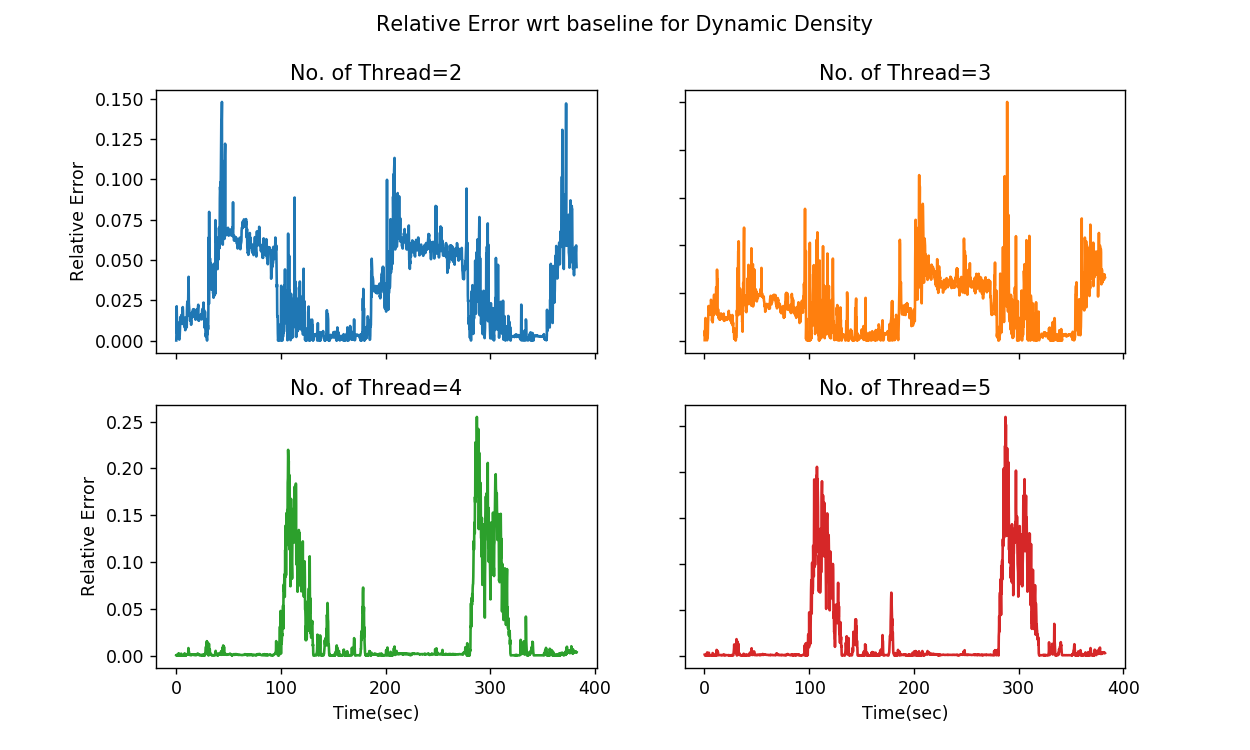

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10,6))
ax1.set_xticklabels([0,0,100,200,300,400])
ax2.set_xticklabels([0,0,100,200,300,400])
ax3.set_xticklabels([0,0,100,200,300,400])
ax4.set_xticklabels([0,0,100,200,300,400])
fig.suptitle('Relative Error wrt baseline for Dynamic Density')
ax1.plot(df1["error_dynamic"])
ax1.set_title('No. of Thread=2')
ax2.plot(df2["error_dynamic"], 'tab:orange')
ax2.set_title('No. of Thread=3')
ax3.plot(df3["error_dynamic"], 'tab:green')
ax3.set_title('No. of Thread=4')
ax4.plot(df4["error_dynamic"], 'tab:red')
ax4.set_title('No. of Thread=5')
for ax in fig.get_axes():
    ax.set(xlabel='Time(sec)', ylabel='Relative Error')
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('method3_4.png')

<IPython.core.display.Javascript object>


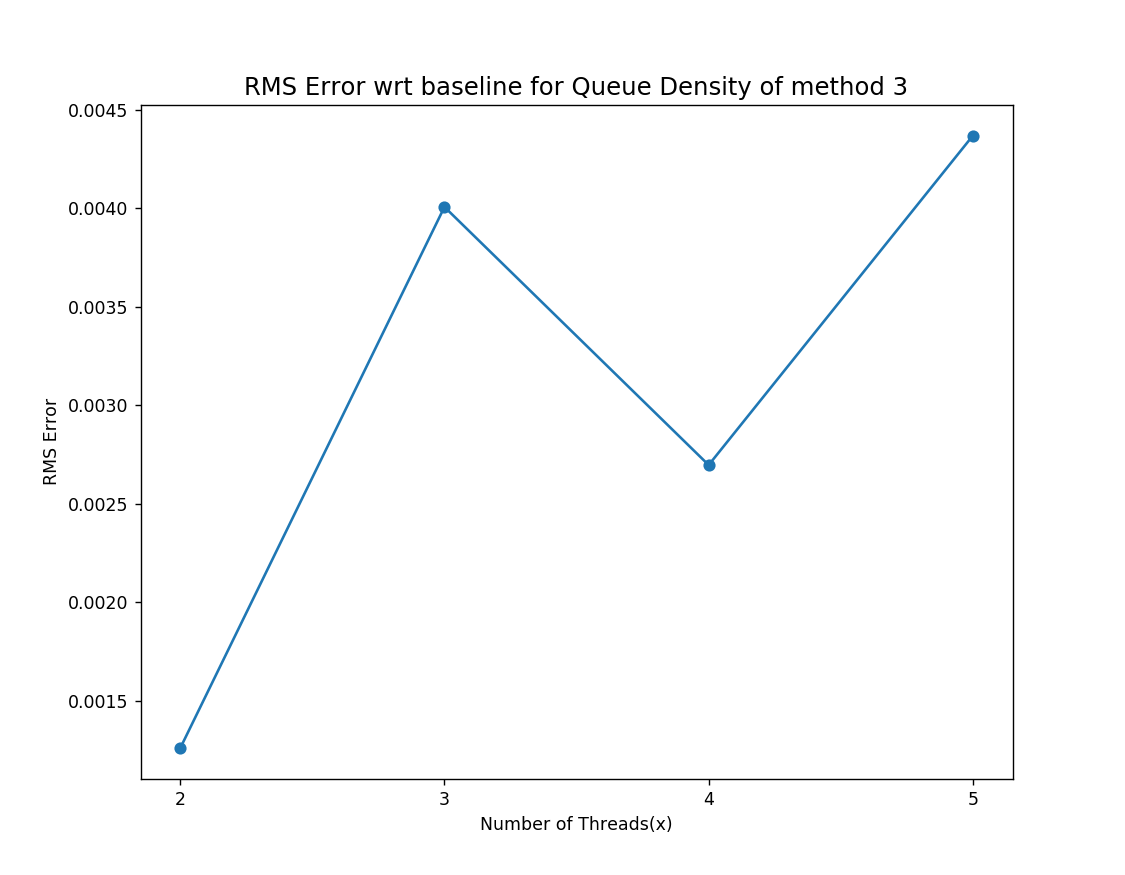

In [59]:
fig = plt.figure(figsize=(9,7))
plt.plot(['2','3','4','5'],l_q,marker="o")
plt.ylabel('RMS Error')
plt.xlabel('Number of Threads(x)')
plt.title('RMS Error wrt baseline for Queue Density of method 3',fontsize=14)
plt.savefig('method3_5.png')

<IPython.core.display.Javascript object>


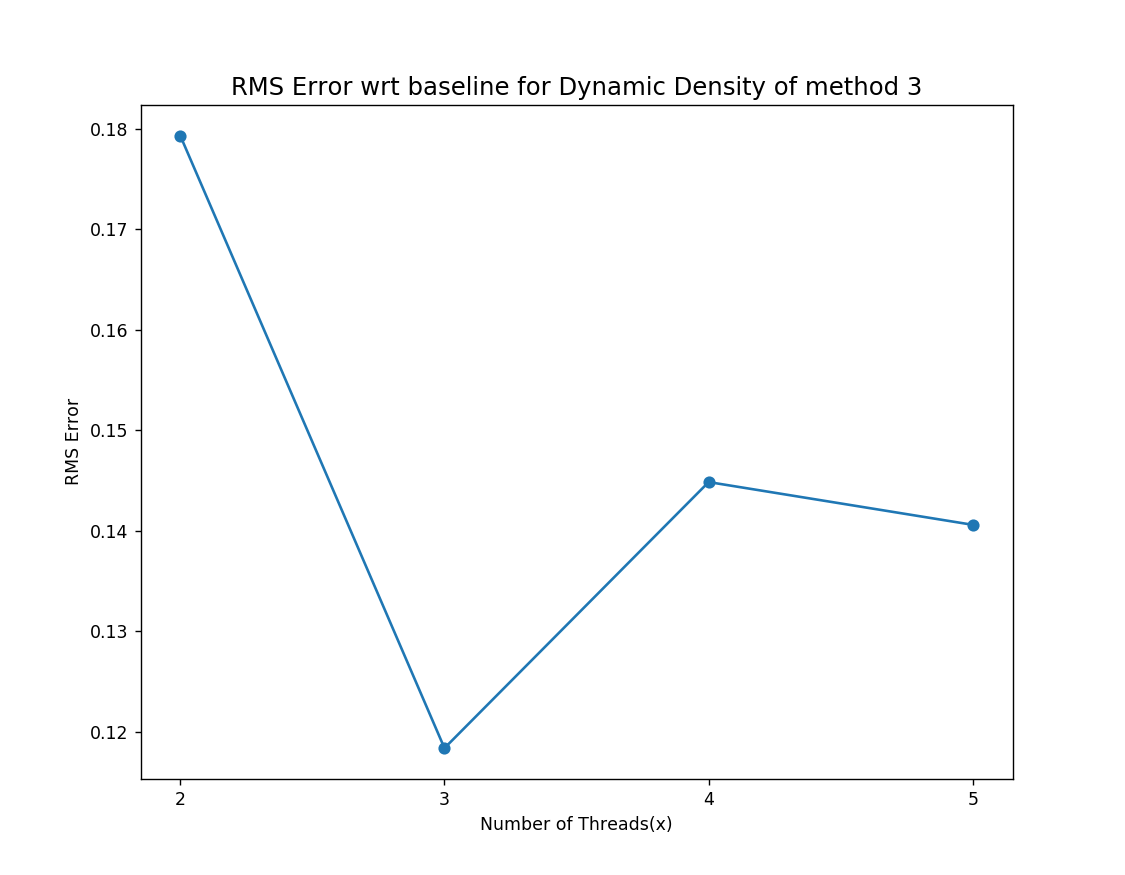

In [60]:
fig = plt.figure(figsize=(9,7))
plt.plot(['2','3','4','5'],l_d,marker="o")
plt.ylabel('RMS Error')
plt.xlabel('Number of Threads(x)')
plt.title('RMS Error wrt baseline for Dynamic Density of method 3',fontsize=14)
plt.savefig('method3_6.png')

In [61]:
l_q_=[]
for i in l_q:
    l_q_+=[1/i,]
l_d_=[]
for j in l_d:
    l_d_+=[1/j,]

<IPython.core.display.Javascript object>


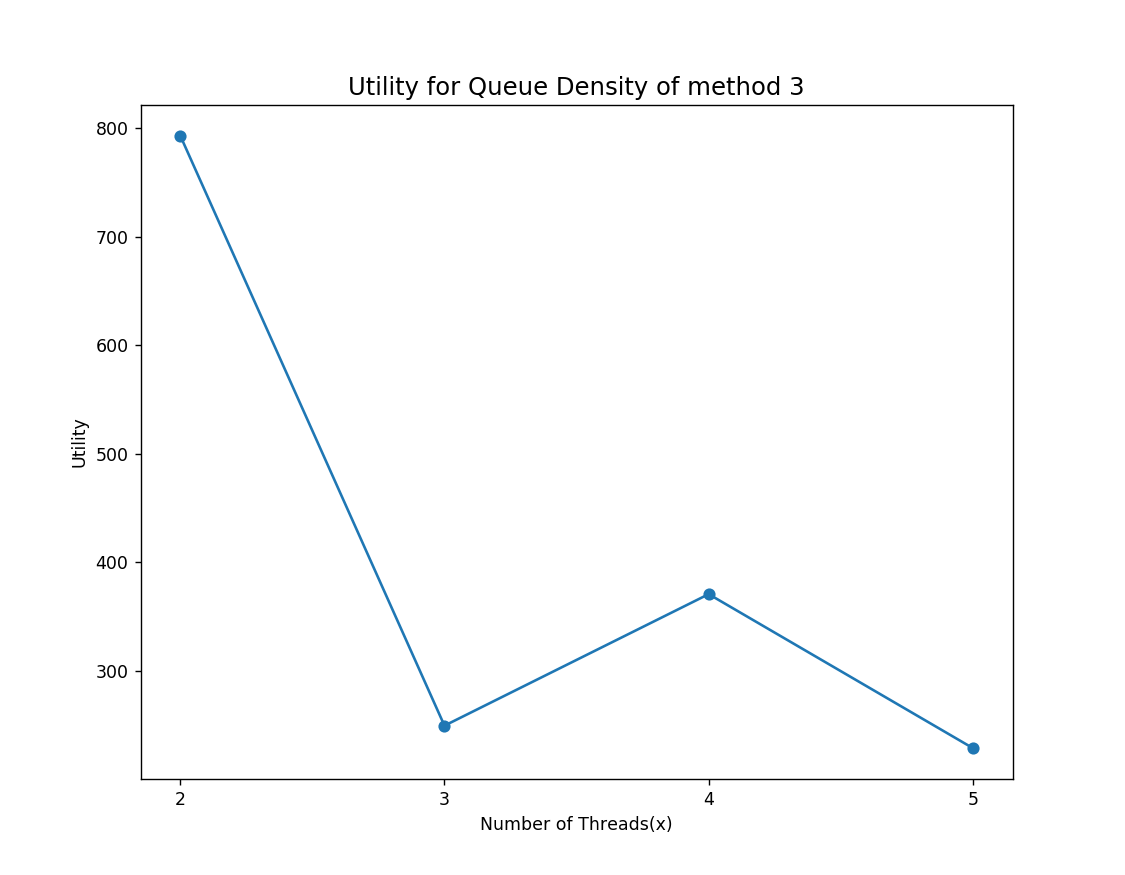

In [62]:
fig = plt.figure(figsize=(9,7))
plt.plot(['2','3','4','5'],l_q_,marker="o")
plt.ylabel('Utility')
plt.xlabel('Number of Threads(x)')
plt.title('Utility for Queue Density of method 3',fontsize=14)
plt.savefig('method3_7.png')

<IPython.core.display.Javascript object>


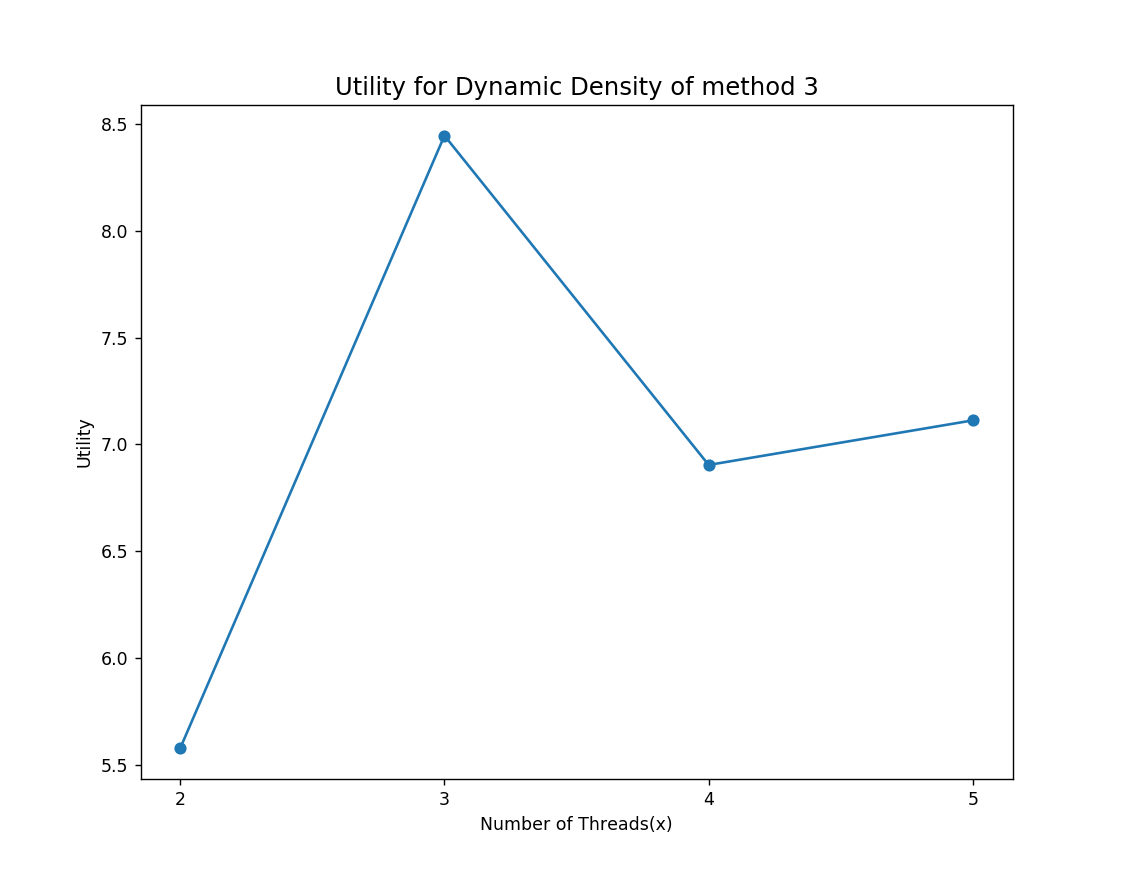

In [63]:
fig = plt.figure(figsize=(9,7))
plt.plot(['2','3','4','5'],l_d_,marker="o")
plt.ylabel('Utility')
plt.xlabel('Number of Threads(x)')
plt.title('Utility for Dynamic Density of method 3',fontsize=14)
plt.savefig('method3_8.png')